**Apendice A** 

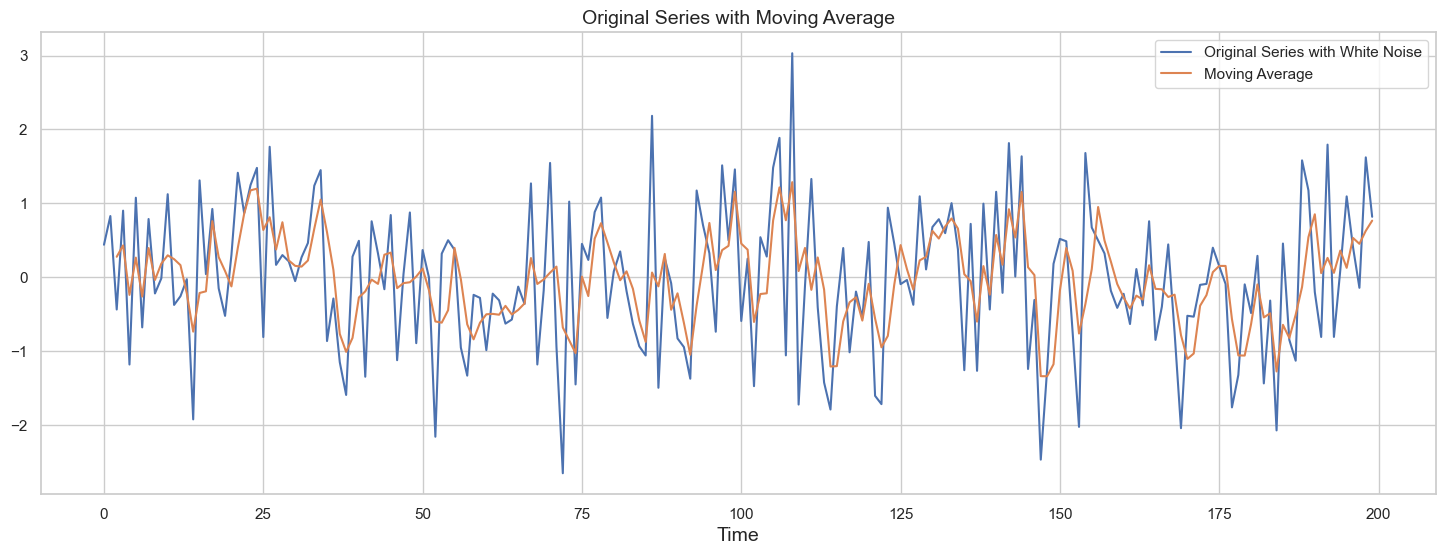

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# Configuración de la semilla para reproducibilidad
random.seed(250)

# Parámetros de la serie temporal
mean = 0
std = 1
n = 200

# Generación de la serie temporal con ruido blanco
w = np.random.normal(mean, std, size=n)
w_series = pd.Series(w)

# Parámetros del modelo de media móvil
window_size = 3
windows = w_series.rolling(window_size)
moving_averages = windows.mean()

# Gráfica de la serie temporal y la media móvil
plt.figure(figsize=(18, 6))
plt.plot(w_series, label='Original Series with White Noise')
plt.plot(moving_averages, label='Moving Average')
plt.title("Original Series with Moving Average", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.legend()
plt.show()


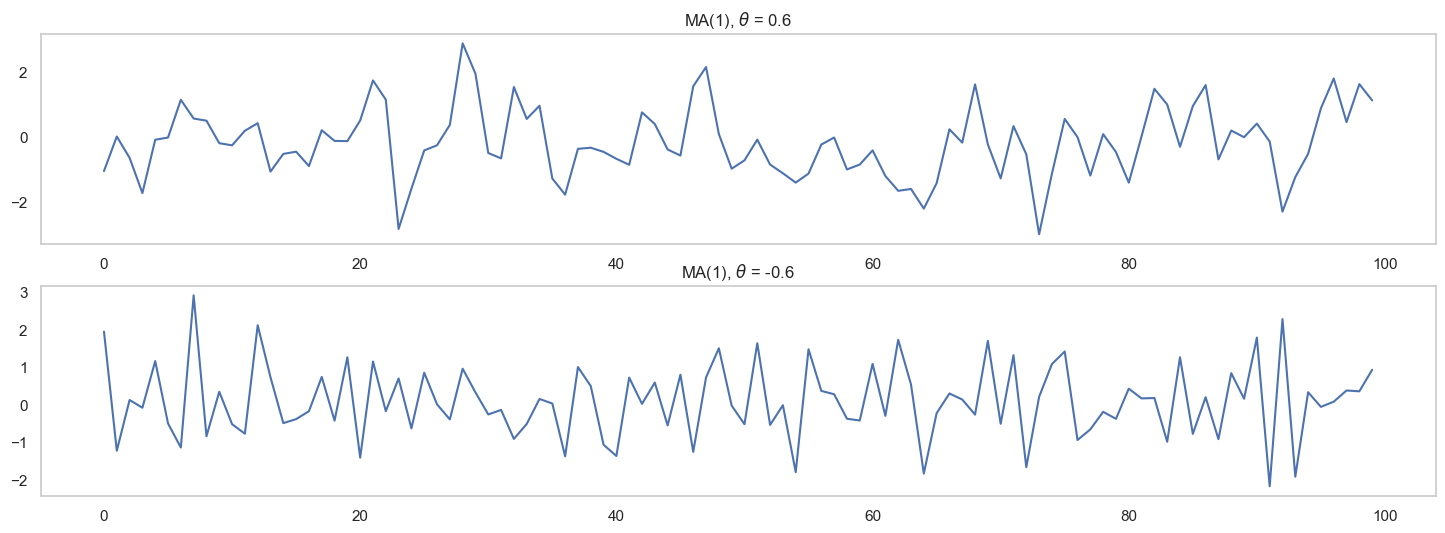

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess

# Definir los parámetros del primer modelo MA(1) con theta = 0.6
ar1 = np.array([1])  # Debe incluirse el coeficiente de rezago cero, que es 1
ma1 = np.array([1, +0.6])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_ma1_1 = MA_object1.generate_sample(nsample=100)

# Definir los parámetros del segundo modelo MA(1) con theta = -0.6
ar2 = np.array([1])
ma2 = np.array([1, -0.6])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_ma1_2 = MA_object2.generate_sample(nsample=100)

# Crear subgráficos para visualizar las series temporales simuladas
fig, ax = plt.subplots(2, 1, figsize=(18, 6))
ax[0].plot(simulated_ma1_1)
ax[0].set_title("MA(1), $\\theta$ = 0.6")

ax[1].plot(simulated_ma1_2)
ax[1].set_title("MA(1), $\\theta$ = -0.6")

ax[0].grid()
ax[1].grid()

plt.show()


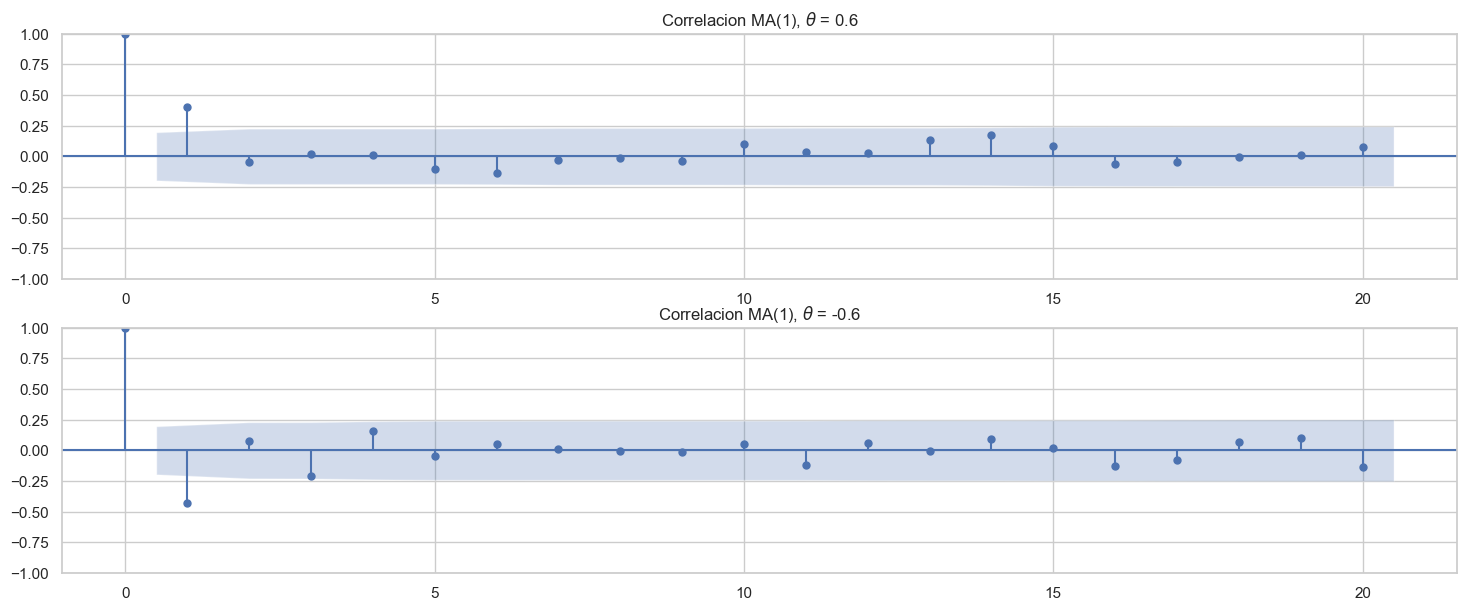

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

# Crear subgráficos para visualizar las funciones de autocorrelación
fig, ax = plt.subplots(2, 1, figsize=(18, 7))

# ACF para la serie temporal con theta = 0.6
plot_acf(simulated_ma1_1, ax=ax[0])
ax[0].set_title("Correlacion MA(1), $\\theta$ = 0.6")

# ACF para la serie temporal con theta = -0.6
plot_acf(simulated_ma1_2, ax=ax[1])
ax[1].set_title("Correlacion MA(1), $\\theta$ = -0.6")

plt.show()


**Apendice B**

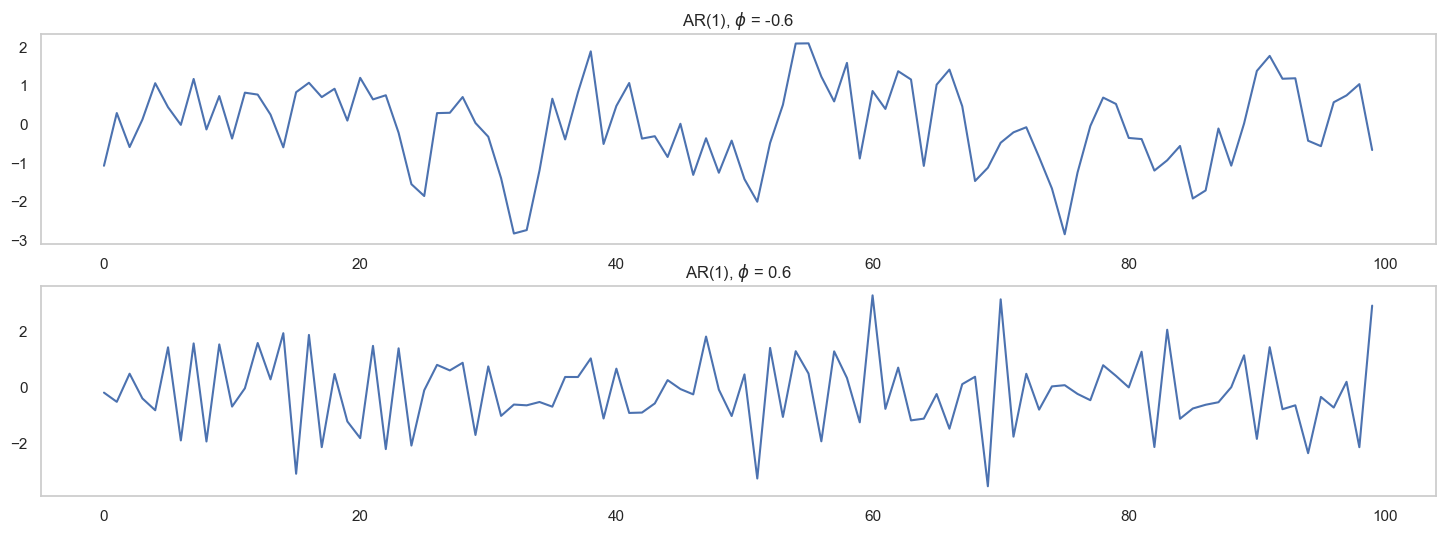

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from statsmodels.tsa.arima_process import ArmaProcess

random.seed(250)

# Plot 1: AR parameter = +0.6
ar1 = np.array([1, -0.6])  # Coeficiente AR es ahora -0.6
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_ar1_1 = AR_object1.generate_sample(nsample=100)

# Plot 2: AR parameter = -0.6
ar2 = np.array([1, 0.6])  # Coeficiente AR es ahora 0.6
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_ar1_2 = AR_object2.generate_sample(nsample=100)

fig, ax = plt.subplots(2, 1, figsize=(18, 6))
ax[0].plot(simulated_ar1_1)
ax[0].set_title("AR(1), $\\phi$ = -0.6") 
ax[1].plot(simulated_ar1_2)
ax[1].set_title("AR(1), $\\phi$ = 0.6")  
ax[0].grid()
ax[1].grid()
plt.show()


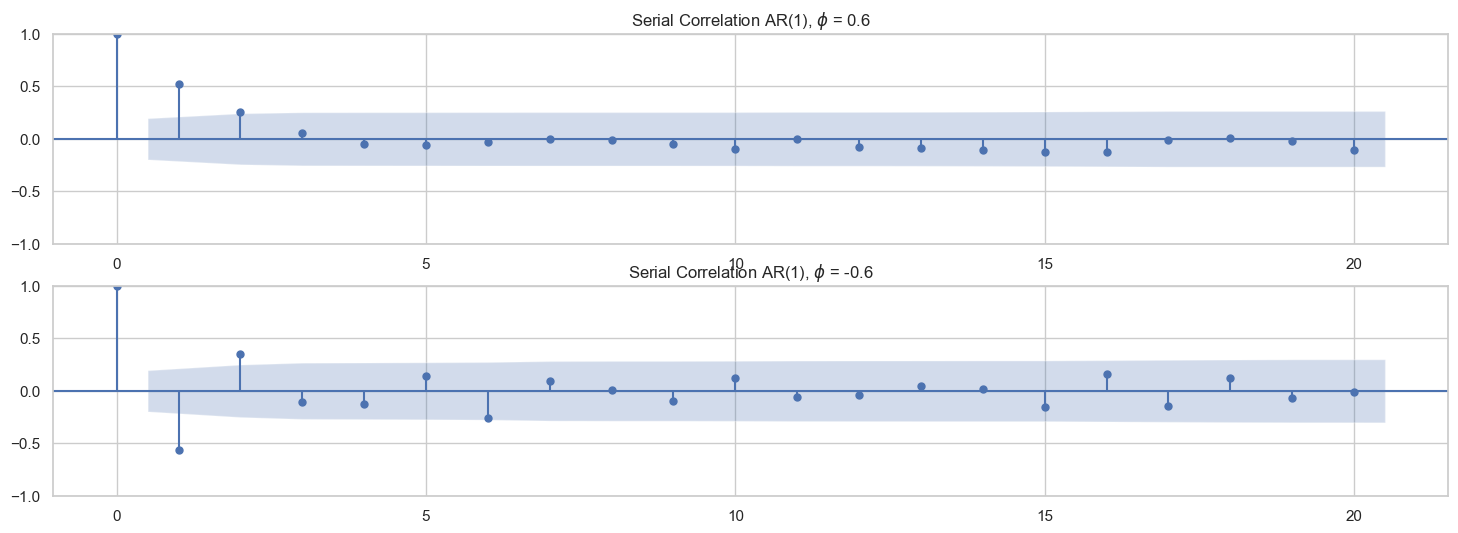

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(2, 1, figsize=(18, 6))

plot_acf(simulated_ar1_1, ax=ax[0])
ax[0].set_title("Serial Correlation AR(1), $\\phi$ = 0.6")

plot_acf(simulated_ar1_2, ax=ax[1])
ax[1].set_title("Serial Correlation AR(1), $\\phi$ = -0.6")

plt.show()

**Apendice C**

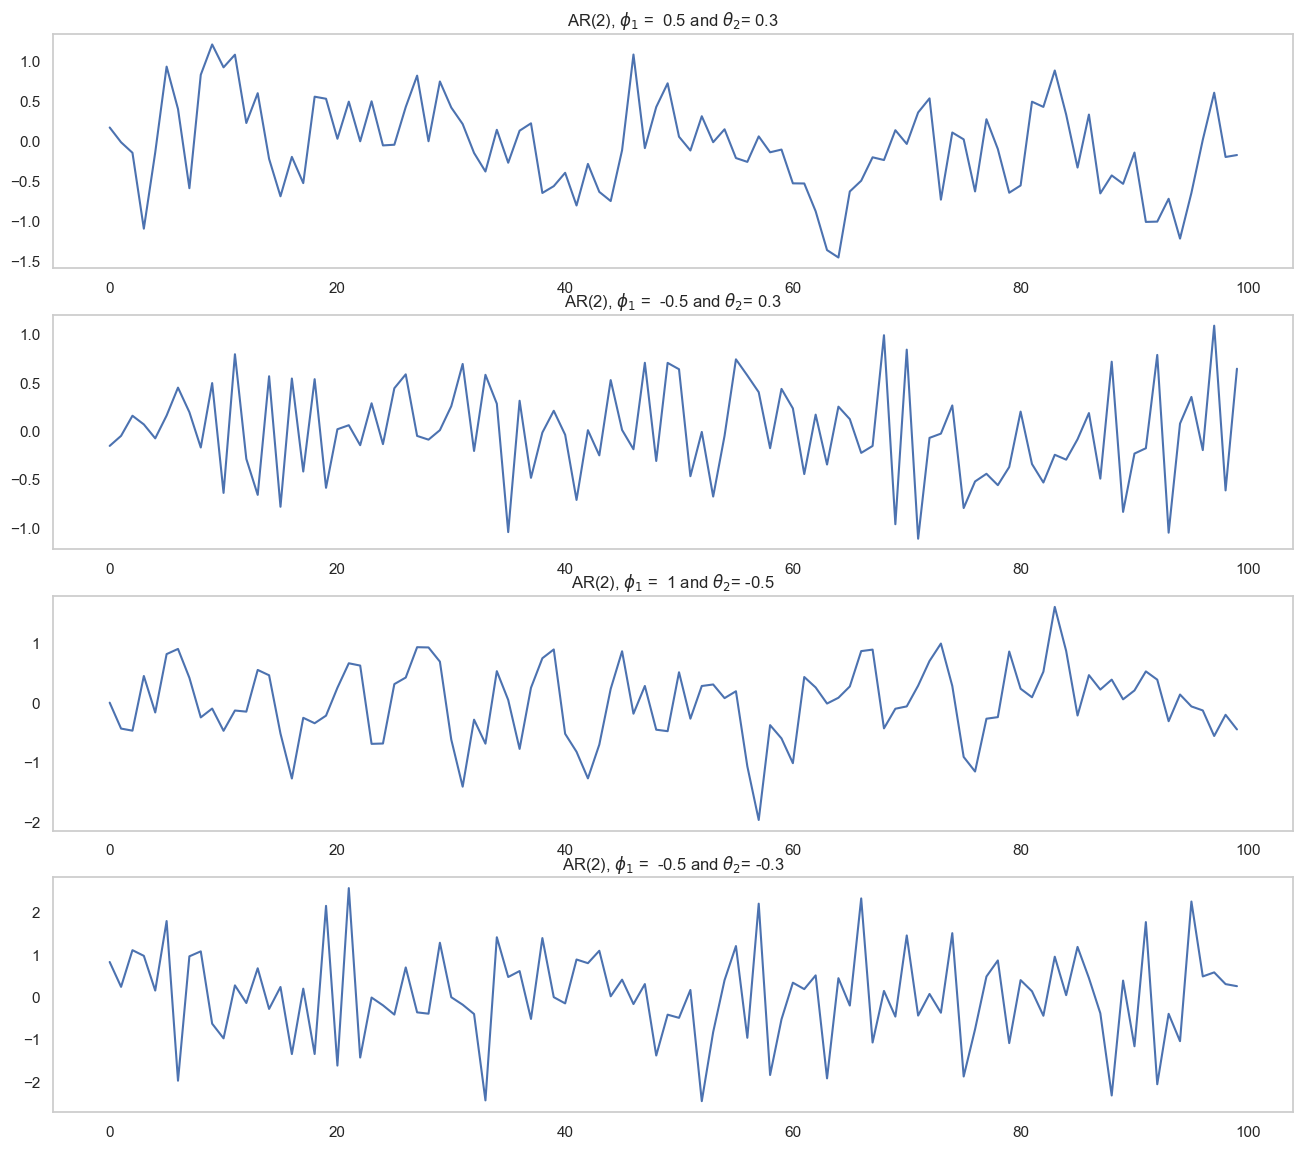

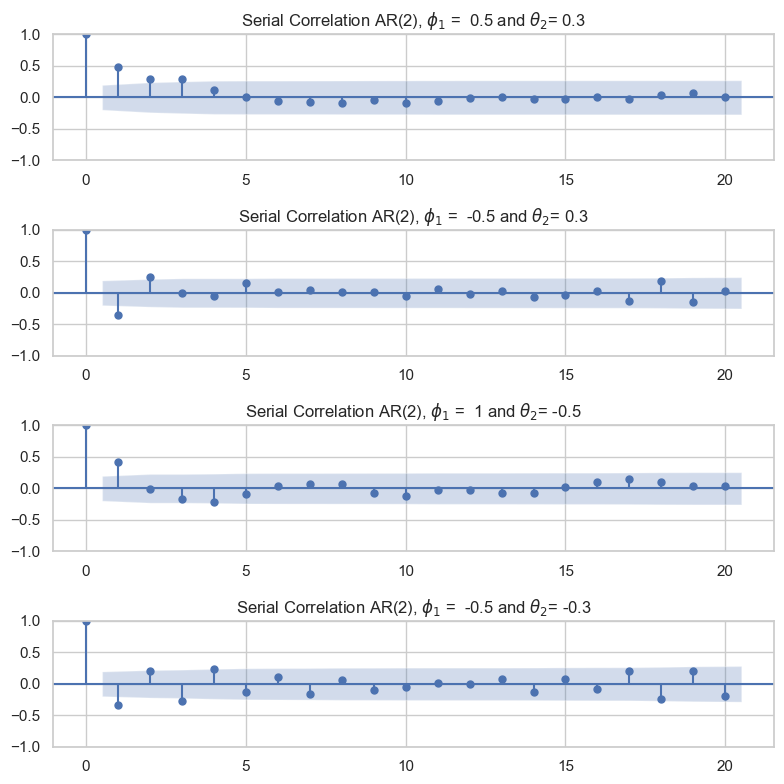

In [7]:
# AR parameter = 0.5, 0.3
ar2_I = np.array([2, -0.5, -0.3])
ma2_I = np.array([1])
AR_object2_I = ArmaProcess(ar2_I, ma2_I)
simulated_ar2_I_1 = AR_object2_I.generate_sample(nsample=100)

# AR parameter = -0.5, 0.3
ar2_II = np.array([2, +0.5, -0.3])
ma2_II = np.array([1])
AR_object2_II = ArmaProcess(ar2_II, ma2_II)
simulated_ar2_II_1 = AR_object2_II.generate_sample(nsample=100)

# AR parameter = 1, -0.5
ar2_III = np.array([2, -1, +0.5])
ma2_III = np.array([1])
AR_object2_III = ArmaProcess(ar2_III, ma2_III)
simulated_ar2_III_1 = AR_object2_III.generate_sample(nsample=100)

# AR parameter = +0.6
ar2_IV = np.array([2, +0.5, -0.3])
ma2_IV = np.array([2])
AR_object2_IV = ArmaProcess(ar2_IV, ma2_IV)
simulated_ar2_IV_1 = AR_object2_IV.generate_sample(nsample=100)

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(4, 1, figsize=(16, 14))
ax[0].plot(simulated_ar2_I_1)
ax[0].set_title("AR(2), $\\phi_1$ =  0.5 and $\\theta_2$= 0.3")
ax[1].plot(simulated_ar2_II_1)
ax[1].set_title("AR(2), $\\phi_1$ =  -0.5 and $\\theta_2$= 0.3 ")
ax[2].plot(simulated_ar2_III_1)
ax[2].set_title("AR(2), $\\phi_1$ =  1 and $\\theta_2$= -0.5")
ax[3].plot(simulated_ar2_IV_1)
ax[3].set_title("AR(2), $\\phi_1$ =  -0.5 and $\\theta_2$= -0.3") 
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.show()

fig, ax = plt.subplots(4, 1, figsize=(8, 8))
plot_acf(simulated_ar2_I_1, ax=ax[0])
ax[0].set_title("Serial Correlation AR(2), $\\phi_1$ =  0.5 and $\\theta_2$= 0.3")
plot_acf(simulated_ar2_II_1, ax=ax[1])
ax[1].set_title("Serial Correlation AR(2), $\\phi_1$ =  -0.5 and $\\theta_2$= 0.3 ")
plot_acf(simulated_ar2_III_1, ax=ax[2])
ax[2].set_title("Serial Correlation AR(2), $\\phi_1$ =  1 and $\\theta_2$= -0.5")
plot_acf(simulated_ar2_IV_1, ax=ax[3])
ax[3].set_title("Serial Correlation AR(2), $\\phi_1$ =  -0.5 and $\\theta_2$= -0.3")
plt.tight_layout()
plt.show()


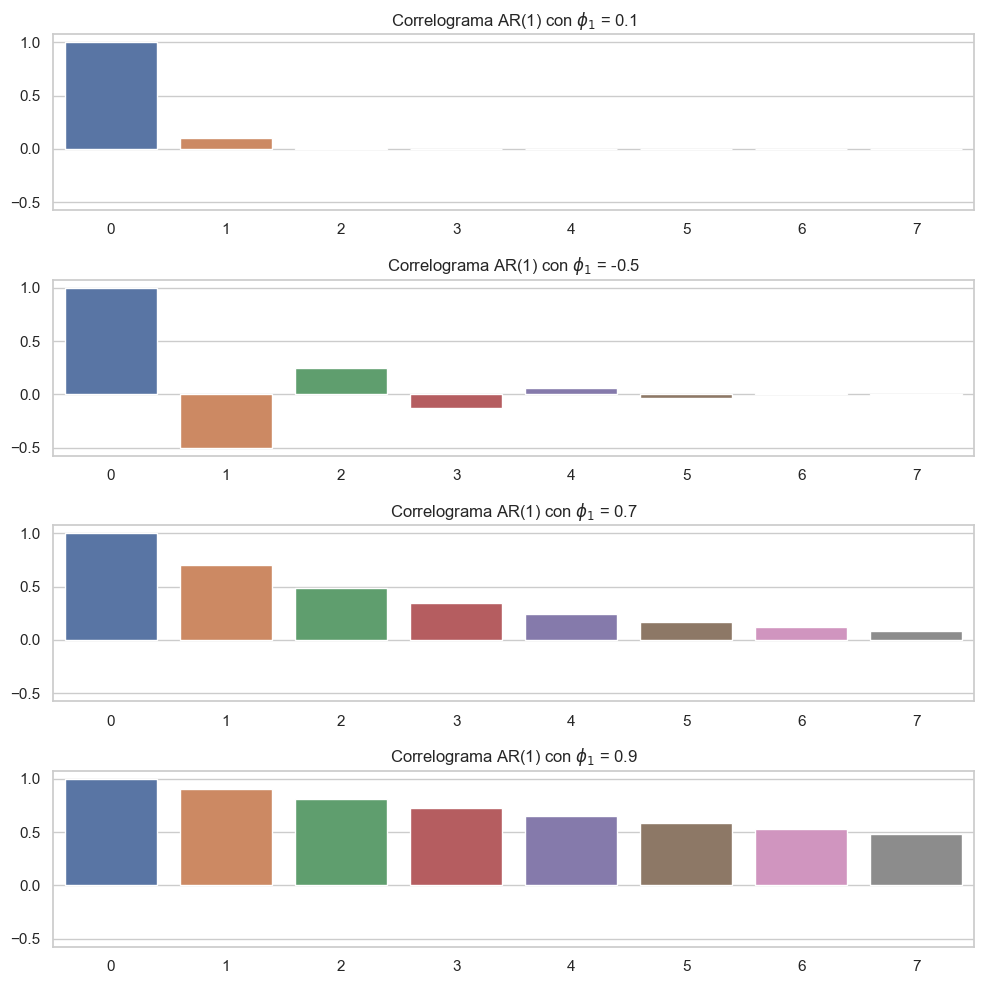

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def autocorrelation(phi):
    Y_values = [phi**i for i in range(8)]
    p_values = [Y_i / Y_values[0] for Y_i in Y_values]
    return p_values

phi_values = [0.1, -0.5, 0.7, 0.9]

sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharey=True)
for i, phi in enumerate(phi_values):
    p_values = autocorrelation(phi)
    sns.barplot(x=np.array(list(range(8))), y=p_values, ax=axes[i])
    axes[i].set_title(f"Correlograma AR(1) con $\\phi_1$ = {phi}")

plt.tight_layout()
plt.show()
